Respuestas de la clase 3:

In [1]:
#Abrir el dataset de peso y altura 'data/weight_height' y mostrar su información relevante.
from __future__ import print_function
import numpy as np
import pandas as pd

D=pd.read_csv('data/weight-height.csv')
D.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
D.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [3]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


/home/carlos/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 31'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


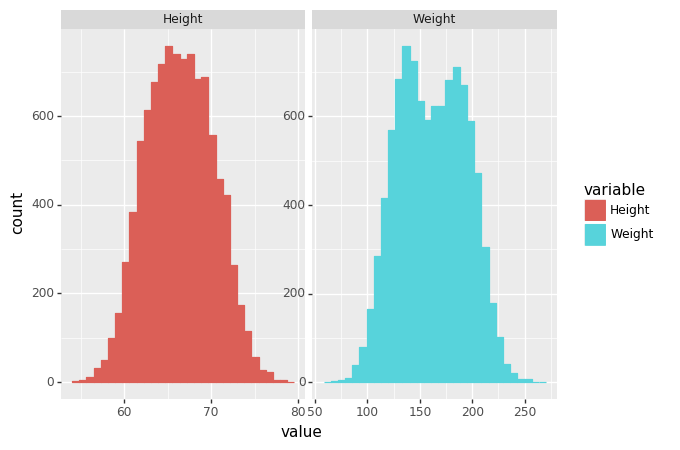

<ggplot: (-9223363269861265969)>

In [11]:
#Mostrar el histograma(ggplot) para cada uno de los valores de peso y altura.
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *

D_aux = pd.melt(D, id_vars='Gender')
ggplot(aes(x='value', color='variable', fill='variable'),data=D_aux) \
    + geom_histogram()+ facet_wrap('variable', scales='free')


In [12]:
#Obtener el histograma(ggplot) de altura para cada género usando comandos de pandas.
hombres = D.loc[D['Gender']=='Male']
mujeres = D.loc[D['Gender']=='Female']

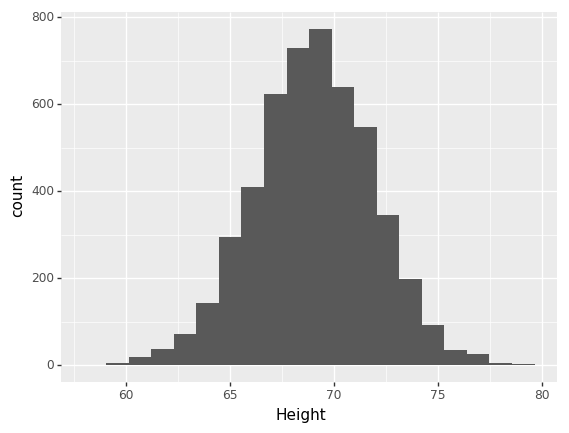

<ggplot: (-9223363269861118492)>

In [13]:
ggplot(aes(x='Height'), data=hombres) + geom_histogram(bins=20)

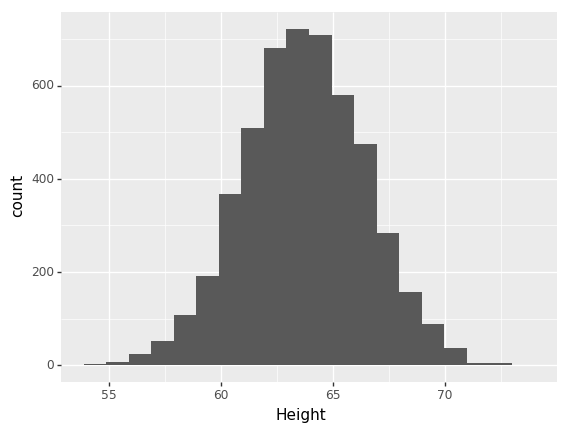

<ggplot: (-9223363269861379552)>

In [14]:
ggplot(aes(x='Height'), data=mujeres) + geom_histogram(bins=20)

161.44035683283076
32.106833544431716


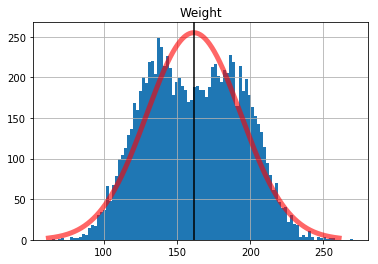

In [20]:
#Usando los datos de peso ajustar una distribución normal y obtener sus parámetros.
pd.DataFrame.hist(D,column='Weight',grid=True,bins=100)
import scipy.stats as ss
from scipy.stats import norm

#media      = np.mean(D["Weight"])
#desviacion = np.var(D["Weight"])
mean, std = ss.norm.fit(D["Weight"])
print(mean) 
print(std) 

x = np.linspace(norm.ppf(0.001, loc=mean, scale=std),
               norm.ppf(0.999, loc=mean, scale=std),
               1000)
y=norm.pdf(x, loc=mean, scale=std)
y=y/y.max()
plt.plot(x, 255*y,  'r-', lw=5, alpha=0.6,)
plt.axvline(x=mean,color='k')
plt.show()

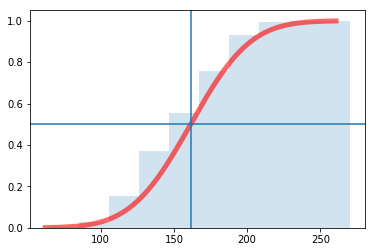

In [21]:
#Mostrar la distribución cumulativa para la distribución resultante para un rango de valores a elegir.
Y=norm.cdf(x, loc=mean, scale=std)
plt.plot(x,Y , 'r-', lw=5, alpha=0.6,)

plt.hist(D.Weight, density=True, histtype='stepfilled',  alpha=0.2, cumulative=True)
plt.axvline(x=mean)
plt.axhline(y=0.5)
plt.show()
#Falta*

In [22]:
#Mostrar la correlación entre las variables.
D.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [23]:
#Hacer una pivot table para el dataset de titanic usando como criterio el género del pasajero.
titanic = pd.read_csv('data/titanic-train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
pivot_genero = titanic.pivot_table(index='Pclass',
                   columns='Survived',
                   values='PassengerId',
                   aggfunc='count')
pivot_genero

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [28]:
#Hacer una prueba estadística para verificar si el género influye en la supervivencia.
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(pivot_genero.as_matrix())

print("El valor p de la prueba es de:", p)
print("Si tuvieran las mismas probabilidades, se esperaría la siguiente proporción \n", ex)

El valor p de la prueba es de: 4.5492517112987287e-23
Si tuvieran las mismas probabilidades, se esperaría la siguiente proporción 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
